## Part 2: Statistical Analysis

### Tasks:
1. Calculate the conversion rates for both campaigns.
2. Conduct hypothesis testing (e.g., t-test or χ² test) to determine the statistical significance of the difference in conversion rates.
3. Visualize the results using:
   - Bar charts
   - Boxplots
   - Histograms

### Output:
- Statistical analysis results, including conversion rates, hypothesis test results, and visualizations.

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from functions import *

In [27]:
a_df = pd.read_csv("datasets/control_i.csv")
b_df = pd.read_csv("datasets/test_i.csv")

In [28]:
# ===========================
# Statistical Analysis:
# 1. Calculate the conversion rate for both campaigns
# ===========================

a_df=calculate_conversion_rate(a_df)
b_df=calculate_conversion_rate(b_df)

a_df=a_df.rename(columns={'Conversion Rate': 'conversion_rate_(%)'})
b_df=b_df.rename(columns={'Conversion Rate': 'conversion_rate_(%)'})

print(f"A group:\n {a_df[['impressions', 'purchase','conversion_rate_(%)']].head()}")
print(f"B group:\n {b_df[['impressions', 'purchase','conversion_rate_(%)']].head()}")

A group:
    impressions  purchase  conversion_rate_(%)
0      29605.0     618.0             2.087485
1      52135.0     511.0             0.980148
2      56602.0     372.0             0.657221
3      31588.0     340.0             1.076358
4      45574.0     523.0             1.147584
B group:
    impressions  purchase  conversion_rate_(%)
0        19414       255             1.313485
1        46889       677             1.443835
2        23782       578             2.430410
3        14324       340             2.373639
4        48718       768             1.576419


In [29]:
# ===========================
# 2. Logarithmic transformation of the conversion rate
# ===========================

# Apply logarithmic transformation to both groups

a_df['log_conversion_rate'] = np.log(a_df['conversion_rate_(%)'] + 1)
b_df['log_conversion_rate'] = np.log(b_df['conversion_rate_(%)'] + 1)

# Check the results after transformation
print(f"Head 'log_conversion_rate' for Control group:\n{a_df['log_conversion_rate'].head()}")
print(f"Head 'log_conversion_rate' for Test group:\n{b_df['log_conversion_rate'].head()}")



Head 'log_conversion_rate' for Control group:
0    1.127357
1    0.683171
2    0.505142
3    0.730615
4    0.764344
Name: log_conversion_rate, dtype: float64
Head 'log_conversion_rate' for Test group:
0    0.838755
1    0.893569
2    1.232680
3    1.215992
4    0.946401
Name: log_conversion_rate, dtype: float64


In [30]:
# ===========================
# 3. Normality test using the Shapiro-Wilk test
# ===========================

# Shapiro-Wilk test to check normality after logarithmic transformation

shapiro_control = stats.shapiro(a_df['log_conversion_rate'].dropna())
shapiro_test = stats.shapiro(b_df['log_conversion_rate'].dropna())

print("Shapiro-Wilk test result for Control group after logarithmic transformation:")
print(f"\tStatistic: {shapiro_control.statistic:.3f}, p-value: {shapiro_control.pvalue:.3f}, {'Normally distributed' if shapiro_control.pvalue > 0.05 else 'Not normally distributed'}")

print("Shapiro-Wilk test result for Test group after logarithmic transformation:")
print(f"\tStatistic: {shapiro_test.statistic:.3f}, p-value: {shapiro_test.pvalue:.3f}, {'Normally distributed' if shapiro_control.pvalue > 0.05 else 'Not normally distributed'}")

Shapiro-Wilk test result for Control group after logarithmic transformation:
	Statistic: 0.978, p-value: 0.772, Normally distributed
Shapiro-Wilk test result for Test group after logarithmic transformation:
	Statistic: 0.948, p-value: 0.151, Normally distributed


In [31]:
# ===========================
# 4. Compare mean values using the t-test
# ===========================

# Perform t-test to compare mean conversion rates between two groups
t_stat, p_value = stats.ttest_ind(b_df['log_conversion_rate'].dropna(), a_df['log_conversion_rate'].dropna(), equal_var=False)

# Print t-test results
print("T-Test")
print(f"\tt-statistic: {t_stat:.3f}")
print(f"\tp-value: {p_value:.3f}, {'Significant' if p_value < 0.05 else 'Not significant'}")



T-Test
	t-statistic: 3.735
	p-value: 0.001, Significant


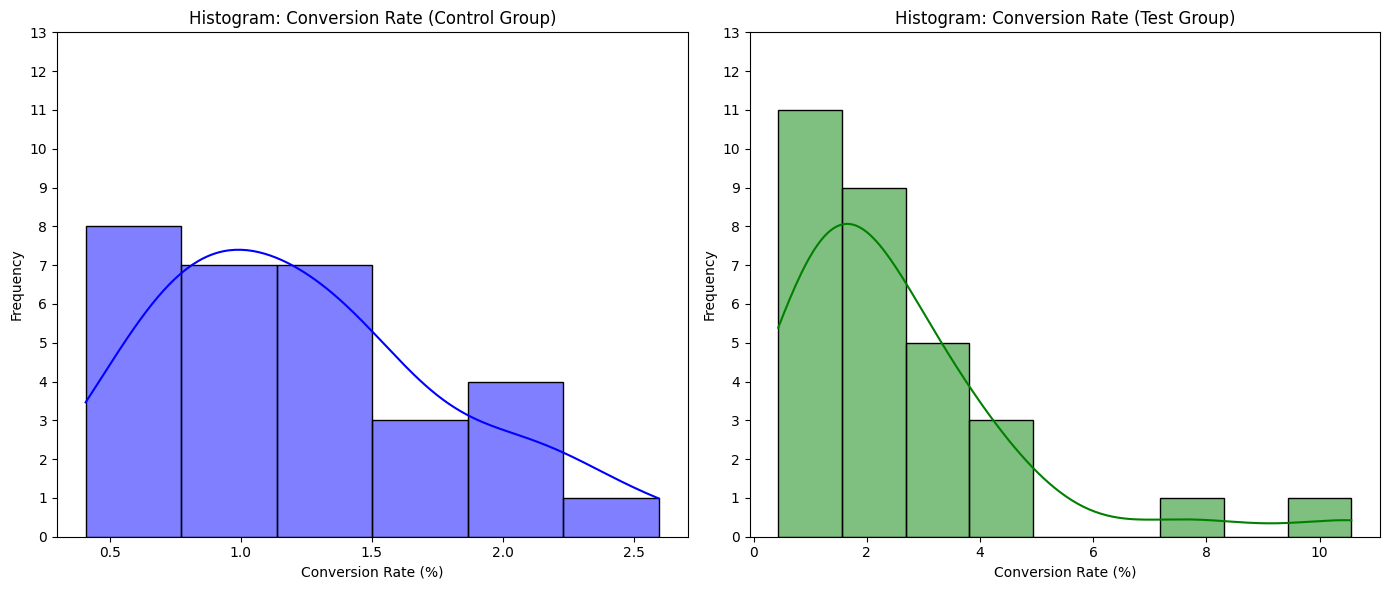

In [32]:
# ===========================
# Visualization of results:
# Histograms, Boxplots
# ===========================

# Create the main figure for subplots with logarithmic transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for the control group conversion rate
sns.histplot(a_df['conversion_rate_(%)'], kde=True, color='blue', ax=ax1)
ax1.set_title('Histogram: Conversion Rate (Control Group)')
ax1.set_xlabel('Conversion Rate (%)')
ax1.set_ylabel('Frequency')
ax1.set_ylim(0, 13)
ax1.yaxis.set_major_locator(MultipleLocator(1))

# Histogram for the test group conversion rate
sns.histplot(b_df['conversion_rate_(%)'], kde=True, color='green', ax=ax2)
ax2.set_title('Histogram: Conversion Rate (Test Group)')
ax2.set_xlabel('Conversion Rate (%)')
ax2.set_ylabel('Frequency')
ax2.set_ylim(0, 13)
ax2.yaxis.set_major_locator(MultipleLocator(1))

plt.tight_layout()
plt.show()

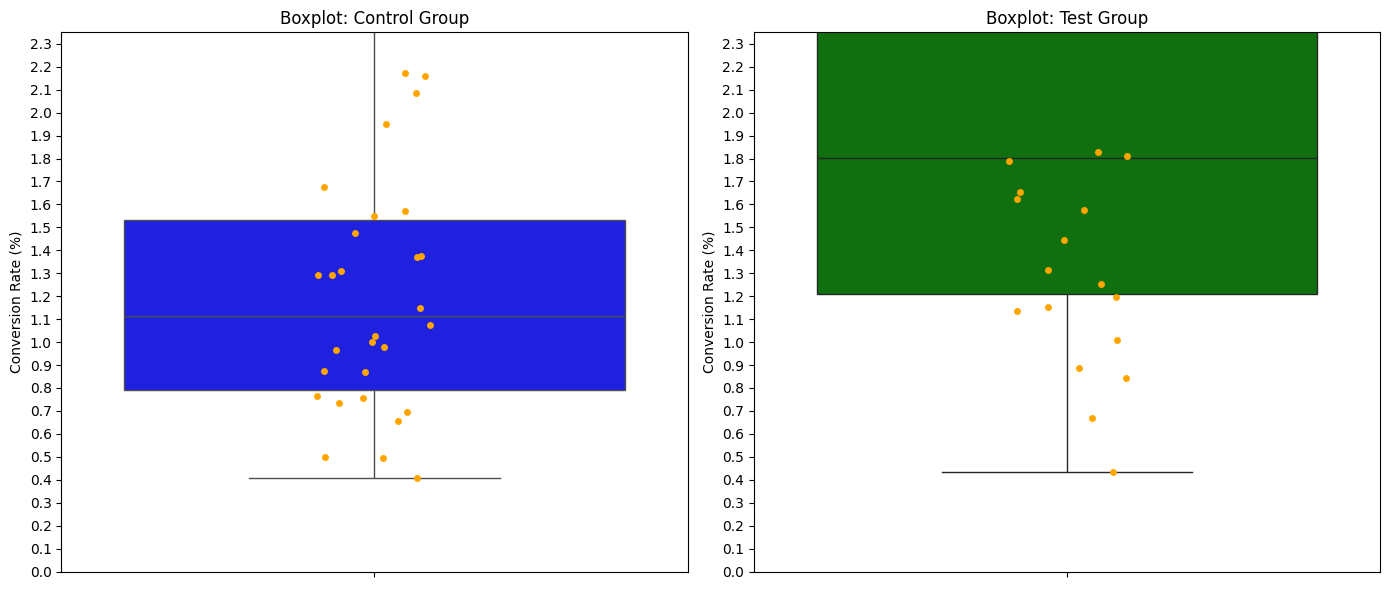

In [33]:
# Create the main figure for two subplots (Boxplots)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for the control group with points
sns.boxplot(data=a_df['conversion_rate_(%)'], color='blue', ax=ax1, showfliers=False)
sns.stripplot(data=a_df['conversion_rate_(%)'], color='orange', jitter=True, size=5, ax=ax1)
ax1.set_title('Boxplot: Control Group')
ax1.set_ylabel('Conversion Rate (%)')

# Set the Y-axis range for the control group
ax1.set_ylim(0, 2.35)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))

# Boxplot for the test group with points
sns.boxplot(data=b_df['conversion_rate_(%)'], color='green', ax=ax2, showfliers=False)
sns.stripplot(data=b_df['conversion_rate_(%)'], color='orange', jitter=True, size=5, ax=ax2)
ax2.set_title('Boxplot: Test Group')
ax2.set_ylabel('Conversion Rate (%)')
ax2.yaxis.set_major_locator(MultipleLocator(0.1))

# Set the Y-axis range for the test group
ax2.set_ylim(0, 2.35)

plt.tight_layout()
plt.show()

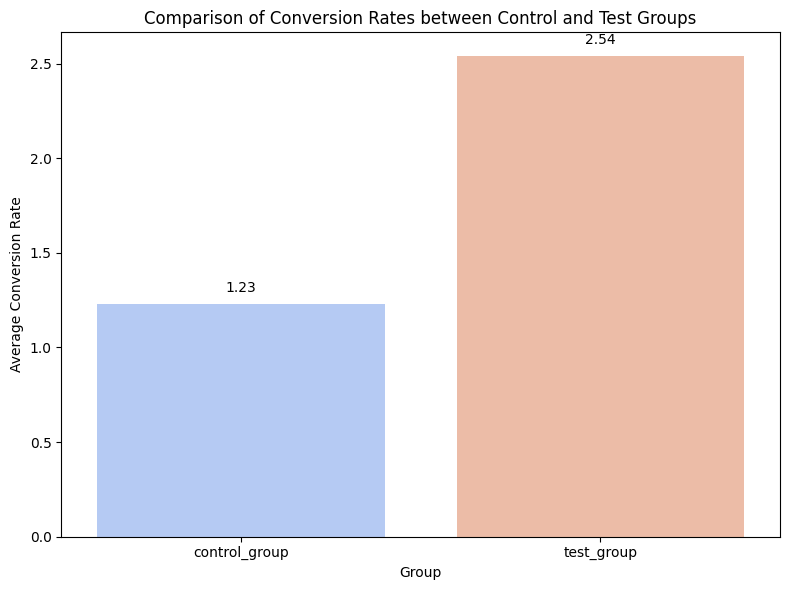

In [34]:
# Compare average conversion rates
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the mean conversion rate for each group
mean_a = a_df['conversion_rate_(%)'].mean()
mean_b = b_df['conversion_rate_(%)'].mean()

# Create a bar chart
sns.barplot(x=['control_group', 'test_group'], y=[mean_a, mean_b], hue=['control_group', 'test_group'], ax=ax, palette='coolwarm', dodge=False, legend=False)

# Annotate bars with exact values
for i, value in enumerate([mean_a, mean_b]):
    ax.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

# Add titles and labels
ax.set_title('Comparison of Conversion Rates between Control and Test Groups')
ax.set_ylabel('Average Conversion Rate')
ax.set_xlabel('Group')

plt.tight_layout()
plt.show()

In [35]:
# Display the conversion rates for both groups
conversion_rates = pd.DataFrame({
    'Group': ['Control', 'Test'],
    'Conversion Rate (%)': [mean_a, mean_b]
})

# Display the table
print(conversion_rates)

# Display the text
if mean_b > mean_a:
    print(f"The test group is better than the control group.\nTest group conversion rate: {mean_b:.2f}%\nControl group conversion rate: {mean_a:.2f}%")
else:
    print(f"The control group is better than the test group.\nControl group conversion rate: {mean_a:.2f}%\nTest group conversion rate: {mean_b:.2f}%")
    

     Group  Conversion Rate (%)
0  Control             1.227426
1     Test             2.539588
The test group is better than the control group.
Test group conversion rate: 2.54%
Control group conversion rate: 1.23%


In [36]:
# Calculate the ratio of conversion rates
improvement_ratio = mean_b / mean_a

# Display the result
print(f"The test group is {improvement_ratio:.2f} times better than the control group.")

The test group is 2.07 times better than the control group.
